# Project: Investigate a Dataset - [TMDb_Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I'll be using TMDb movies dataset for my Data Analysis Project

The dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as id	imdb_id	popularity	budget	revenue	original_title	cast	homepage	director	tagline		overview	runtime	genres	production_companies	release_date	vote_count	vote_average	release_year	budget_adj	revenue_adj etc

### Questions for  My Analysis

1. Average Runtime Of Movies From Year To Year?
2. Which director produces the most movies?
3. Movie details with most and least earned revenue
4. Movie details with the most popularity rating and least popularity rating 
5. Relationship between popularity and profit earned
6. Movie details which had most and least profit


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#importing important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for pandas, since package 'wheel' is not installed.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
  Running setup.py install for pandas: started
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\hp\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages\pandas-1.4.2.dist-info\
   from C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\~andas-1.4.2.dist-info
  Moving to c:\users\hp\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\pyt

  error: subprocess-exited-with-error
  
  × Running setup.py install for pandas did not run successfully.
  │ exit code: 1
  ╰─> [907 lines of output]
      running install
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.10\pandas
      copying pandas\conftest.py -> build\lib.win-amd64-3.10\pandas
      copying pandas\testing.py -> build\lib.win-amd64-3.10\pandas
      copying pandas\_typing.py -> build\lib.win-amd64-3.10\pandas
      copying pandas\_version.py -> build\lib.win-amd64-3.10\pandas
      copying pandas\__init__.py -> build\lib.win-amd64-3.10\pandas
      creating build\lib.win-amd64-3.10\pandas\api
      copying pandas\api\__init__.py -> build\lib.win-amd64-3.10\pandas\api
      creating build\lib.win-amd64-3.10\pandas\arrays
      copying pandas\arrays\__init__.py -> build\lib.win-amd64-3.10\pandas\arrays
      creating build\lib.win-amd64-3.10\pandas\compat
      copying pandas

<a id='wrangling'></a>
## Data Wrangling

>I plan to further observe the TMDB dataset, after that I will be keeping only relevant data needed for analysis and deleting irrelevant data to ensure calculations and analysis are easier




In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Loading csv file and assigning it to df_movies variable
df_movies = pd.read_csv("tmdb-movies.csv")

#Displying first 5 rows and columns
df_movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#checking number of rows and columns
df_movies.shape

(10866, 21)

In [6]:
#Finding duplicates
df_movies[df_movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
#Confirming duplicated rows
df_movies.iloc[2089:2091 ]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
#Finding NULL Values in dataset
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#checking if runtime column has zero values recorded in it
df_movies.query('runtime == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


In [10]:
# statistical values summary 
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Obersvations from TMDB dataset
1. Discovered row 2089 and 2090 have the same values making them duplicates
2. After making a query to check whether some movies have zero runtime I discovered some which I'll be replacing with nan values



### Data Cleaning
 
> 1. There's need to remove duplicated rows
> 2. There's need to remove irrelevant column such as id,imdb_id, homepage,overview and some others
> 3. Release date column needs to be converted to date format for better analysis
> 4. Entries having zero in runtime column needs to be replaced with NAN values
> 5. Removing Zero values from revenue columns
 

1. Removing Duplicated rows
> From the data wrangling section I found out there is only one duplicated row

In [11]:
df_movies.drop_duplicates(keep=False, inplace=True)

In [12]:
#re-checking duplicates
df_movies.duplicated().sum()

0

2. Removing irrelvant columns
> columns to be removed are - 'id','imdb_id','homepage','overview', 'tagline', 'keywords'

In [13]:
#Dropping unnecessary columns 
df_movies.drop(['id','imdb_id','homepage','overview', 'tagline', 'keywords','vote_count', 'vote_average'], axis=1, inplace=True)

In [14]:
#confriming dropped columns
df_movies.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [15]:
#filling missing values with respective mean 
df_movies.fillna(df_movies.mean(), inplace=True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10864 non-null  float64
 1   budget                10864 non-null  int64  
 2   revenue               10864 non-null  int64  
 3   original_title        10864 non-null  object 
 4   cast                  10788 non-null  object 
 5   director              10820 non-null  object 
 6   runtime               10864 non-null  int64  
 7   genres                10841 non-null  object 
 8   production_companies  9834 non-null   object 
 9   release_date          10864 non-null  object 
 10  release_year          10864 non-null  int64  
 11  budget_adj            10864 non-null  float64
 12  revenue_adj           10864 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 1.2+ MB


C:\Users\HP\AppData\Local\Temp\ipykernel_16208\2757896013.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_movies.fillna(df_movies.mean(), inplace=True)


In [16]:
df_movies.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [17]:
#Dropping null values
df_movies.dropna(inplace=True)

In [18]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9771 non-null   float64
 1   budget                9771 non-null   int64  
 2   revenue               9771 non-null   int64  
 3   original_title        9771 non-null   object 
 4   cast                  9771 non-null   object 
 5   director              9771 non-null   object 
 6   runtime               9771 non-null   int64  
 7   genres                9771 non-null   object 
 8   production_companies  9771 non-null   object 
 9   release_date          9771 non-null   object 
 10  release_year          9771 non-null   int64  
 11  budget_adj            9771 non-null   float64
 12  revenue_adj           9771 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 1.0+ MB


3. Changing release_date column into the standard format

In [19]:
df_movies.release_date = pd.to_datetime(df_movies['release_date'])

In [20]:
#Displaying edited dataset
df_movies.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1.747999e+08,1.385749e+09


4. Replacing zero values in runtime column with NAN 

In [21]:
df_movies.runtime = df_movies.runtime.replace(0, np.NAN)

In [22]:
#checking if zero values in runtime still exist in the dataset
df_movies.query('runtime == 0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj


5. Removing Zero values from revenue columns

In [34]:
#replacing all zero values to NAN in revenue column
df_movies.revenue = df_movies.revenue.replace(0, np.NAN)

#Now removing rows with NAN value in revenue column
df_movies.revenue.dropna(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: Average Runtime Of Movies From Year To Year?

In [23]:
#group dataset with respect to the release_year and calculate mean runtime values
year_run = df_movies.groupby('release_year').mean()['runtime']

Text(0, 0.5, 'Avg_Runtime')

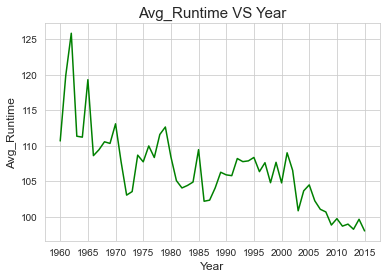

In [24]:
#graph setup
sns.set_style("whitegrid")
year_run.plot(color='green', xticks = np.arange(1960,2016,5))
plt.Figure(figsize=(12,8))
plt.title("Avg_Runtime VS Year", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Avg_Runtime",fontsize=12)

> __Judging from the plot above it clearly shows that movie runtime/duration decreases from year to year which as of today its very True. People don't spend time watching long durated movies anymore__

### Research Question 2: Which director produces the most movies?

In [25]:

director = df_movies.director.value_counts()
print(director.head(10))

Woody Allen          42
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      26
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64


> From the above analysis Woody Allen produces the most movies

### Research Question 3: Movie details with most and least earned revenue

In [39]:
#Function Definition
def compute(column):
    #Calculate most earned revenue
    high = df_movies[column].idxmax()
    h_details = pd.DataFrame(df_movies.loc[high])
    #Calculate least earned revenue
    low = df_movies[column].idxmin()
    l_details = pd.DataFrame(df_movies.loc[low])

    #Group collected data
    details = pd.concat([h_details, l_details], axis=1)

    return details

compute('revenue')

,1386,5067
popularity,9.432768,0.462609
budget,237000000,6000000
revenue,2781505847.0,2.0
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162.0,94.0
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


The information above clearly shows that row 1386 with original_title Avatar has the most revenue earned i.e 2781505847.0.

And also clearly shows the row 5067 with original_title Shattered Glass has the least revenue earned i.e 2.0

### Research Question 4: Movie details with the most popularity rating and least popularity rating 

In [41]:
#calling compute function created earlier 
compute('popularity')

,0,9977
popularity,32.985763,0.000188
budget,150000000,0
revenue,1513528810.0,NaN
original_title,Jurassic World,The Hospital
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,George C. Scott|Diana Rigg|Richard Dysart|Barn...
director,Colin Trevorrow,Arthur Hiller
runtime,124.0,103.0
genres,Action|Adventure|Science Fiction|Thriller,Mystery|Comedy|Drama
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Simcha Productions
release_date,2015-06-09 00:00:00,2071-12-14 00:00:00


row 0 is considered the movie with the most popular rating and row 9977 with the least

### Research Question 5: Relationship between popularity and profit earned

In [42]:
#Creating profit_earned column
df_movies['profit_earned'] = df_movies['revenue'] - df_movies['budget']

In [57]:
#computing popluarity mean
mean_val = df_movies.popularity.mean()
low_popular = df_movies.query('popularity < {}'.format(mean_val))
high_popular = df_movies.query('popularity >= {}'.format(mean_val))

In [58]:
#Average profit_earned for low_popular and high_popular
avg_profit_low = low_popular['profit_earned'].mean()
avg_profit_high = high_popular['profit_earned'].mean()

In [59]:
#Displaying top dataset
df_movies.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,profit_earned
0,32.985763,150000000,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,28.419936,150000000,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,13.112507,110000000,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,11.173104,200000000,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,9.335014,190000000,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1.747999e+08,1.385749e+09,1.316249e+09


<BarContainer object of 2 artists>

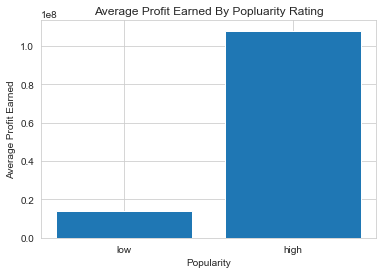

In [62]:
#Plotting a bar graph for the relationship
heights = [avg_profit_low,avg_profit_high]
locations = [1,2]
labels = ['low','high']
plt.title('Average Profit Earned By Popluarity Rating')
plt.xlabel('Popularity')
plt.ylabel('Average Profit Earned')
plt.bar(locations, heights, tick_label=labels)

This bar chart above expliitly shows that higher popularity rating leads to more average profit earned and vice-versa

### Research Question 6: Movie details which had most and least profit

In [64]:
#calling the compute function once again 
#to provide details for most profit earned and least profit earned
compute('profit_earned')

,1386,2244
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847.0,11087569.0
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162.0,100.0
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


Row 1386 consist of movie details with the highest profit earned and Row 2244 with the least profit earned details

<a id='conclusions'></a>
## Conclusions
An interesting analysis process with the TMDB dataset.
I was able to discover some very interesting facts about movies. 

1. Duration of movies decrease from year to year 
2. Woody Allen is the director that produces the most movies with total count of 42 and Clint Eastwood with total count of 34
3. Avatar with runtime 162 and release year 2009 is known to have the most revenue of 2781505847.0 and James Cameron as the director, whereas Shattered Glass with runtime 94 and release year 2003 is known have the least revenue of 2 and Billy Ray as the director
4. Jurassic World with runtime 124 and release year 2015 is known to have the highest popularity rating of 32.985763 and Colin Trevorrow as the director, whereas The Hospital with runtime 103 and release year 1971 is known have the lowest popularity rating of 0.000188 and Arthur Hiller as the director
5. Higher popularity rating leads to more Average profit Earned

## Limitations
Missing values as well as  most zero values present in the dataset affected the analysis process.
The budget and revenue column are not formatted in any currency unit, there's possibilty that different movies have budget in different currency according to the country they are produce in.

## Resources Used
Stackoverflow,Medium,Pandas and Numpy Documentation,geeksforgeeks.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])